# Simple Neural Network

In [1]:
#ติดตั้ง fastai
!pip install -q fastbook==0.0.29
import fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [2]:
from fastai.vision.all import *
from fastbook import *
import torch

matplotlib.rc('image', cmap='Greys')

# เขียน plot_function ใหม่เพื่อความสะดวก
# เนื่องจาก pytorch ใหม่ต้องใช้อาร์กิวเมนต์ขั้นตอนสำหรับ torch.linspace
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min, max, steps=100)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))

# เทรนโมเดลจำแนกรูปเลข 3 และเลข 7 จาก [ชุดข้อมูล MNIST](http://yann.lecun.com/exdb/mnist/)

## โหลดข้อมูลรูปเลข 3 และเลข 7

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
#แบ่งเป็น train, validation, test
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [5]:
#ในแต่ละ set จะมีเลข 3 และ 7
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [6]:
#ในละ folder 3 และ 7 จะเป็นไฟล์รูป
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [7]:
#จำนวนรูปในแต่ละ class
len(threes), len(sevens)

(6131, 6265)

In [8]:
im3_path = threes[6000]
im3 = Image.open(im3_path)
im3

In [9]:
im7_path = sevens[6000]
im7 = Image.open(im7_path)
im7

In [10]:
#รูปขนาด 28 x 28 pixels
array(im3).shape

(28, 28)

In [11]:
#เปลี่ยนจาก numpy array
array(im3)[4:10,4:10]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=uint8)

In [12]:
#เป็น torch tensor
tensor(im3)[4:10,4:10]

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.uint8)

In [13]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[:,:])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,67,156,209,254,255,246,48,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,34,118,239,253,253,253,253,254,253,226,16,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,14,175,247,253,254,253,253,210,205,254,253,253,19,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,126,253,253,253,214,130,49,15,122,254,234,116,2,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,95,223,162,80,0,0,0,9,208,254,173,0,0,0,0,0,0,0


In [14]:
im7_t = tensor(im7)
df = pd.DataFrame(im7_t[:,:])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,9,9,14,18,71,141,255,177,102,0,0,0,0,0,0,0,0
8,0,0,0,0,0,33,154,154,154,154,154,200,200,231,253,253,253,253,253,228,32,0,0,0,0,0,0,0
9,0,0,0,0,0,79,253,253,253,253,253,253,253,253,253,253,253,253,253,253,53,0,0,0,0,0,0,0


## ดูว่ามี pixel เหมือนกันแค่ไหน

In [15]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

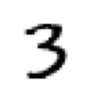

In [16]:
show_image(three_tensors[1]);

In [17]:
#เรามัดเลข 3 และ 7 ทั้งหมดรวมกันตามคลาสแล้วหารมันด้วย 255 เพื่อให้ได้ค่าระหว่าง 0 และ 1
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape, stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [18]:
len(stacked_threes.shape)

3

In [19]:
stacked_threes.ndim

3

<Axes: >

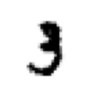

In [20]:
#เลข 3 ที่ index 0
show_image(stacked_threes[0,:,:])

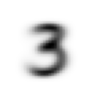

In [21]:
#เลข 3 โดยเฉลี่ย
mean3 = stacked_threes.mean(0)
show_image(mean3);

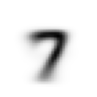

In [22]:
#เลข 7 โดยเฉลี่ย
mean7 = stacked_sevens.mean(0)
show_image(mean7);

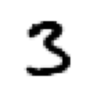

In [23]:
#เลข 3 อันที่ 125
a_3 = stacked_threes[125]
show_image(a_3);

In [24]:
#ความห่างระหว่า "เลข 3 อันที่ 125" กับ "เลข 3 โดยเฉลี่ย"
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1259), tensor(0.2290))

In [25]:
#ความห่างระหว่า "เลข 3 อันที่ 125" กับ "เลข 7 โดยเฉลี่ย"
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1836), tensor(0.3390))

In [26]:
#ใช้ function ของ pytorch คิดก็ได้
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1836), tensor(0.3390))

ความแตกต่างระหว่าง mean squared error และ mean absolute error

In [27]:
a = torch.tensor([1, 2, 3]).float()
b = torch.tensor([2.,3.,4.5])
c = torch.tensor([2.,3.,40.])

#mse และ mae ไม่ต่างกันเท่าไหร่สำหรับ a และ b
(a-b).abs().mean().item(), \
((a-b)**2).mean().sqrt().item(),

(1.1666666269302368, 1.1902379989624023)

In [28]:
#mse และ mae ต่างกันเกือบเท่าตัวสำหรับ a และ c
(a-c).abs().mean().item(),\
((a-c)**2).mean().sqrt().item()

(13.0, 21.3775577545166)

## Stochastic Gradient Descent (SGD)

### คำนวณ Gradients เพื่อทำ Backpropagation

In [29]:
# set some inputs
x = -2; y = 5; z = -4

# perform the forward pass
q = x + y # q becomes 3
f = q * z # f becomes -12

# perform the backward pass (backpropagation) in reverse order:
# first backprop through f = q * z
dfdz = q # df/dz = q, so gradient on z becomes 3
dfdq = z # df/dq = z, so gradient on q becomes -4
# now backprop through q = x + y
dfdx = 1.0 * dfdq # dq/dx = 1. And the multiplication here is the chain rule!
dfdy = 1.0 * dfdq # dq/dy = 1

dfdx, dfdy

(-4.0, -4.0)

In [30]:
xt = torch.tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [31]:
#ฟังชั่น f(x) = (x1^2 + x2^2 +...+xn^2)
def f(x): return (x**2).sum()

yt = f(xt) #ใส่ 3, 4, 10 เข้าไปได้ 3^2+4^2+10^2 = 125
yt

tensor(125., grad_fn=<SumBackward0>)

In [32]:
#ถ้าคิดด้วยมือ df(x)/dx = 2x
#สำหรับ x1=3, x2=4, x3=10 ก็จะเป็น
#df(x1)/dx1 = 6, df(x2)/dx2 = 8, df(x3)/dx3 = 20

#ใช้ autograd หา df(x1)/dx1, df(x2)/dx2, df(x3)/dx3
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

## สร้าง Loss Function สำหรับจำแนกรูปเลข 3 และเลข 7

#### สร้าง X และ y

In [33]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [34]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [35]:
#เราสามารถนำ iterables สองอันมาต่อกันแบบนี้ได้ด้วย zip
a = [1,2,3]
b = [4,5,6]
list(zip(a,b))

[(1, 4), (2, 5), (3, 6)]

In [36]:
dset = list(zip(train_x,train_y))
example = dset[0]

#คู่ Inputs　และ Labels
example[0].shape, example[1].shape

(torch.Size([784]), torch.Size([1]))

In [37]:
#สร้าง validation set ในแบบเดียวกัน
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

#### Initiate `Weights`

In [38]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [39]:
#Inputs มี dimension (batch_size, 28*28)
#เพราะงั้นถ้าเราจะคูณรายตัว (element-wise multiplication)
#ด้วย W^T, W ต้องมี dimension (28*28,1)
weights = init_params((28*28,1))
weights.shape

torch.Size([784, 1])

In [40]:
#bias มีแค่ (1) dimension แล้วจะถูก broadcast ไปทุก dimension ของ batch size เอง
# (1) -> (batch_size,1)
bias = init_params(1)
bias

tensor([0.3472], requires_grad=True)

In [41]:
weights.shape, bias.shape, train_x.shape, train_x[7].shape

(torch.Size([784, 1]),
 torch.Size([1]),
 torch.Size([12396, 784]),
 torch.Size([784]))

#### Forward Pass

In [42]:
#คำนวณ forward pass สำหรับตัวอย่าง 7
(train_x[7]*weights.T).sum(1)[:,None] + bias

tensor([[-15.2588]], grad_fn=<AddBackward0>)

In [43]:
#คำนวณ forward pass สำหรับทุกตัวอย่าง
(train_x*weights.T).sum(1)[:,None] + bias

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

In [44]:
#เขียนเป็นฟังชั่น; @ คือ matrix multiplication ใน pytorch
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

#### Metric ใช้ Accuracy

In [45]:
#ถ้าสมมุติว่า Predictions >0 ให้ทายเป็น 1 (เลข 3)
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [46]:
from collections import Counter
Counter((preds>0.0).float().numpy()[:,0])

Counter({0.0: 10788, 1.0: 1608})

In [47]:
#จะเห็นได้ว่ามันถูกเครื่องๆ (เพราะเราเดาสุ่มด้วย weights ที่สุ่มมา)
corrects.float().mean().item()

0.5379961133003235

In [48]:
#ถ้าเราเปลี่ยน weights เล็กน้อย
with torch.no_grad():
    weights *= 5.0001
    bias+=10

In [49]:
#ความแม่นยำก็เปลี่ยนนิดนึง
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.548402726650238

#### Loss Function อย่างง่าย

In [50]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [51]:
#loss function ที่จะเป็นจะเป็น Predictions ของ class ที่ผิด
#เพราะงั้นยิ่งทาย class ที่ผิดแบบมั่นใจมาก Loss ก็จะยิ่งสูง
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [52]:
#ถ้าเป้าหมาย == 1 ดังนั้น loss คือห่างจาก 1 แค่ไหน
#ถ้าเป้าหมาย == 0 ดังนั้น lossคือห่างจาก 0 แค่ไหน
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [53]:
mnist_loss(prds,trgts)

tensor(0.4333)

In [54]:
#ถ้าทายแม่นขึ้น loss ก็ลดลง
mnist_loss(tensor([0.9, 0.4, 0.8]), trgts)

tensor(0.2333)

### Activation Function - Sigmoid

In [55]:
def sigmoid(x): return 1/(1+torch.exp(-x))

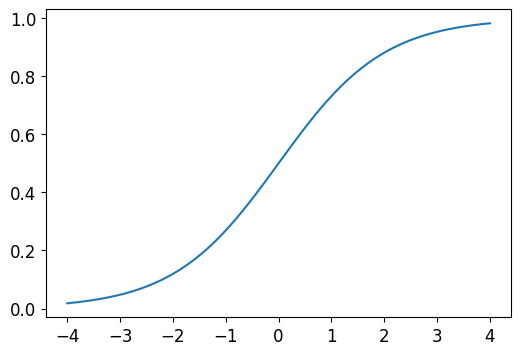

In [56]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [57]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    #ใส่ sigmoid ไป; pytorch tensor มี built-in function ให้แล้ว
    return torch.where(targets==1, 1-predictions, predictions).mean()

### SGD and Mini-Batches

In [58]:
#ทดลองใช้ Dataloader สุ่มตัวเลขจาก 0-14; batch ละ 5 ตัวอย่าง; ให้สุ่มด้วย
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [59]:
#สมมุติเรามี DataSet　แบบนี้
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [60]:
#ก็ใส่เข้าไปใน dataloader ได้เช่นกัน
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

## Putting It All Together

#### Initialize weights

In [61]:
weights = init_params((28*28,1))
bias = init_params(1)

#### Initialize dataloader

In [62]:
#สร้าง dataloader สำหรับ train
dl = DataLoader(dset, batch_size=256, shuffle=True)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [63]:
#เราจะไม่ shuffle validation set
valid_dl = DataLoader(valid_dset, batch_size=256, shuffle=False)

In [64]:
#(batch size, 28*28)
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

#### Forward pass

In [65]:
def linear1(xb): return xb@weights + bias
preds = linear1(xb)
preds.shape

torch.Size([256, 1])

#### Calculate loss

In [66]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()
loss = mnist_loss(preds, xb)
loss

tensor(0.7690, grad_fn=<MeanBackward0>)

#### Backward pass - get gradients and update weights

In [67]:
loss.backward()
weights.grad.shape,weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(0.0049), tensor([0.0425]))

In [68]:
#คำนวณ gradient ด้วย .backward()
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [69]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0007), tensor([0.0070]))

In [70]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0064), tensor([-0.0285]))

In [71]:
#เราจำเป็นต้อง reset gradients เพื่อไม่ให้มันบวกเพิ่มขึ้นเรือ่ยๆ
weights.grad.zero_();
bias.grad.zero_();

In [72]:
#เทรน 1 epoch
def train_epoch(model, lr, params):
    #โยนทุก batch ให้โมเดลที่ละ batch จนหมด
    for xb,yb in dl:
        #คำนวน loss และ gradients
        calc_grad(xb, yb, model)
        #เปลี่ยน weights ด้วย gradient * learning rate (lr)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [73]:
#คิด accuracy
((preds>0.0).float() == yb).float().mean()

tensor(0.5469)

###  Calculate metric (accuracy in this case)

In [74]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [75]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.5000)

In [76]:
#ทำการ validate ด้วย validation set
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [77]:
validate_epoch(linear1)

0.5485

In [78]:
#เทรนไป 1 epoch; accuracy เพิ่มเกือบเท่าตัว!
lr = 1.

params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.9252

In [79]:
#เทรนไป 20 epoch; ทายถูกเกือบหมด
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.9554 0.9608 0.9633 0.9657 0.9681 0.9696 0.9716 0.973 0.974 0.974 0.975 0.9775 0.9745 0.976 0.9779 0.9779 0.9784 0.9784 0.9784 0.9789 

### Optimizer as a class

In [80]:
#nn.Linear ก็คือฟังชั่นที่ x*W.T + b เราเขียนเมื่อกี้เลย
linear_model = nn.Linear(28*28,1, bias=True)
linear_model

Linear(in_features=784, out_features=1, bias=True)

In [81]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [82]:
#optimizer　แบบง่ายที่สุด
class BasicOptim:
    def __init__(self,params,lr):
        self.params,self.lr = list(params),lr

    #step ทำการ update weights
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    #zero grad เพื่อทำการรีเซต gradients
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [83]:
opt = BasicOptim(linear_model.parameters(), lr)

In [84]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        #เปลี่ยนโค้ดเป็น optimizer แทน
        opt.step()
        opt.zero_grad()

In [85]:
validate_epoch(linear_model)

0.3569

In [86]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [87]:
#ได้ผลดีเหมือนเดิม
train_model(linear_model, 20)

0.9706 0.975 0.975 0.978 0.978 0.9784 0.9794 0.9794 0.9799 0.9804 0.9804 0.9804 0.9804 0.9814 0.9819 0.9823 0.9823 0.9819 0.9823 0.9828 